**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
import math

# import data 2C_weka.csv for 2 Class Classifcation.


In [27]:
data1 = pd.read_csv('C:\\Users\\sande\\Desktop\\h20\\AIML\\Residency-2\\project3-KNN\\2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [28]:
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [29]:
data1.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [30]:
data1.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [31]:
data1['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

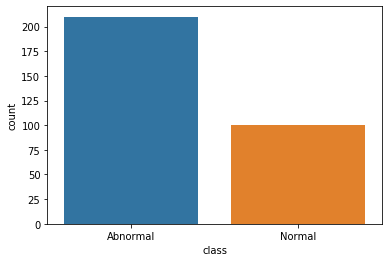

In [32]:
# Distribution of Class Values
sns.countplot(x='class',data=data1)

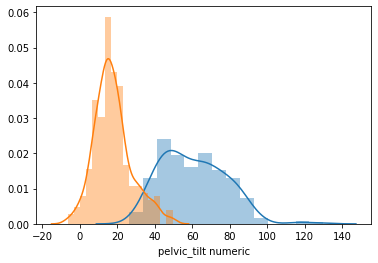

In [64]:
sns.distplot(data1['pelvic_incidence'])

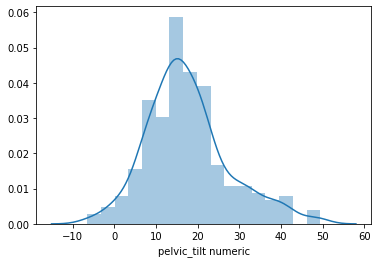

In [35]:
sns.distplot(data1['pelvic_tilt numeric'])

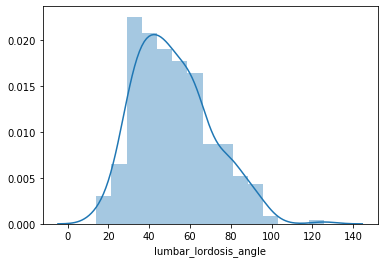

In [36]:
sns.distplot(data1['lumbar_lordosis_angle'])

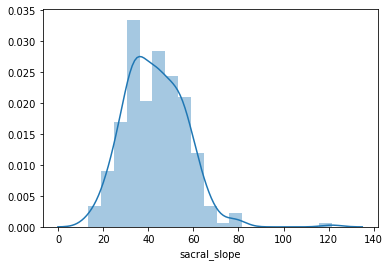

In [37]:
sns.distplot(data1['sacral_slope'])

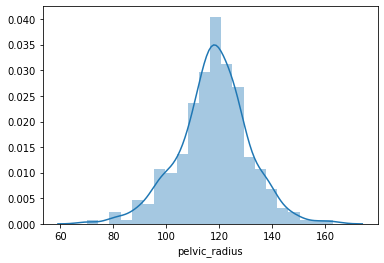

In [38]:
sns.distplot(data1['pelvic_radius'])

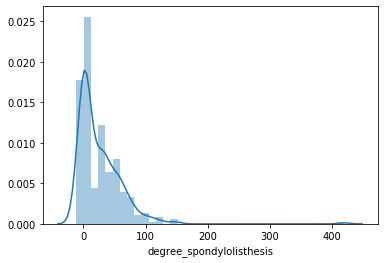

In [39]:
sns.distplot(data1['degree_spondylolisthesis'])

In [27]:
data1.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

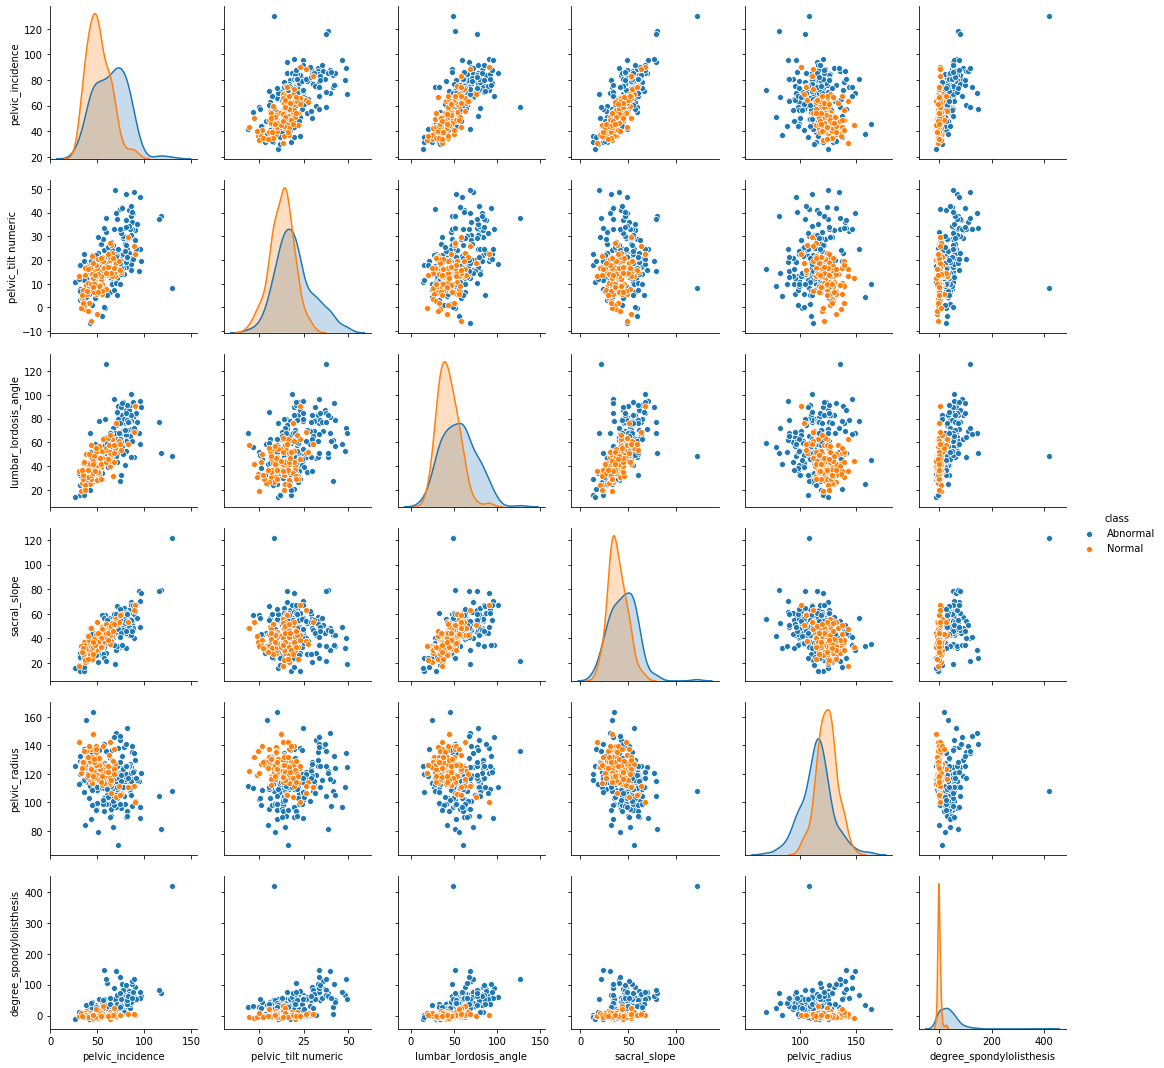

In [25]:
sns.pairplot(data1, hue='class')    

In [40]:
# In order to understand the correlation 
data1.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


# Encode the Class variable to integer.

In [41]:
# Using LabelEncoder and fitting it to [0,1]
le = preprocessing.LabelEncoder()
le.fit([0,1])

LabelEncoder()

In [42]:
le.classes_

array([0, 1])

In [43]:
# We now can transform the Labels in Class column in to numeric(0,1)
data1['class']=le.fit_transform(data1['class'].astype('str'))
data1.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
94,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
31,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832,0
17,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020,0
290,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,1
14,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947,0
19,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402,0
112,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671,0
68,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,0
103,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [44]:
# Create a separate dataframe consisting only of the features i.e independent attributes

data1_ind = data1.drop(labels= "class" , axis = 1)
data1_ind.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [45]:
# Capture the class values from the 'class' column into a pandas series akin to array 

data1_lab = data1["class"]

# Normalize your Data (X) to get values between 0 to 1.

In [46]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

data1_ind_z = data1_ind.apply(zscore)  # convert all attributes to Z scale 
# store the normalized features data into np array 

X = np.array(data1_ind_z)
X.shape

(310, 6)

In [47]:
# store the bc_labels data into a separate np array

y = np.array(data1_lab)
y.shape

(310,)

# Split the dat as train and test with a ratio of 70:30.

In [48]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [49]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [50]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [51]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7849462365591398

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [52]:
# calculate accuracy measures and confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

[[54 12]
 [ 8 19]]


In [53]:
print(metrics.accuracy_score(y_test, predicted_labels))

0.7849462365591398


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [54]:
# As total number of rows are 310 , the optimal value of K is less than square root (310)
math.sqrt(310)

17.60681686165901

In [55]:
mis=[0]*10
j=0
ma=0
for i in range(1,18,2):
    N= KNeighborsClassifier(n_neighbors= i, weights = 'distance' )
    N.fit(X_train, y_train)
    predicted_labels = N.predict(X_test)
    N.score(X_test, y_test)
    mis[j]=1-metrics.accuracy_score(y_test, predicted_labels)
    print("For k value {}, the Misclassification error is {}".format(i,metrics.accuracy_score(y_test, predicted_labels)))
    print("For k value {}, the Misclassification error is {}".format(i,mis[j]))
    if ma<=metrics.accuracy_score(y_test, predicted_labels):
        ma=metrics.accuracy_score(y_test, predicted_labels)
        k=i
    j+=1
print("Maximum Accuracy is {} Obtained at K value : {}".format(ma,k))

For k value 1, the Misclassification error is 0.7419354838709677
For k value 1, the Misclassification error is 0.25806451612903225
For k value 3, the Misclassification error is 0.7741935483870968
For k value 3, the Misclassification error is 0.22580645161290325
For k value 5, the Misclassification error is 0.7849462365591398
For k value 5, the Misclassification error is 0.21505376344086025
For k value 7, the Misclassification error is 0.7849462365591398
For k value 7, the Misclassification error is 0.21505376344086025
For k value 9, the Misclassification error is 0.7849462365591398
For k value 9, the Misclassification error is 0.21505376344086025
For k value 11, the Misclassification error is 0.8064516129032258
For k value 11, the Misclassification error is 0.19354838709677424
For k value 13, the Misclassification error is 0.7849462365591398
For k value 13, the Misclassification error is 0.21505376344086025
For k value 15, the Misclassification error is 0.7741935483870968
For k value 1

# Therefore the optimal value of k is 11 with 80.6% accuracy in 2 class problem

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [57]:
data2 = pd.read_csv('C:\\Users\\sande\\Desktop\\h20\\AIML\\Residency-2\\project3-KNN\\3Classdata.csv')

In [58]:
data2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [59]:
data2.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [60]:
data2.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [61]:
data2['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

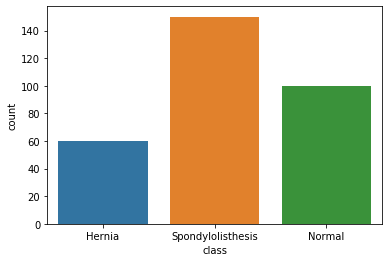

In [62]:
# Distribution of Class Values
sns.countplot(x='class',data=data2)

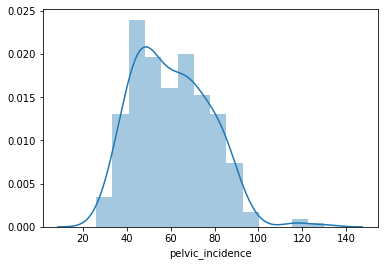

In [65]:
sns.distplot(data2['pelvic_incidence'])

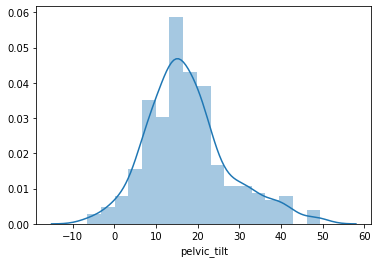

In [66]:
sns.distplot(data2['pelvic_tilt'])

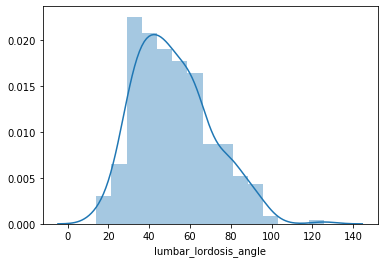

In [67]:
sns.distplot(data2['lumbar_lordosis_angle'])

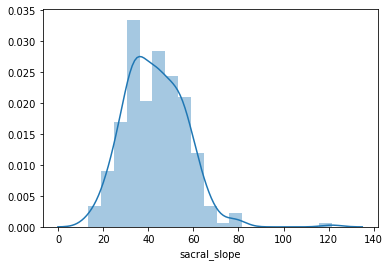

In [68]:
sns.distplot(data2['sacral_slope'])

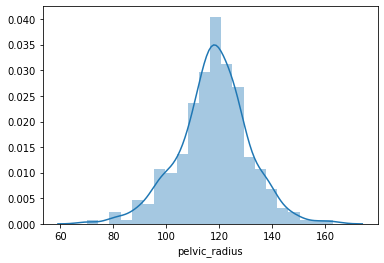

In [69]:
sns.distplot(data2['pelvic_radius'])

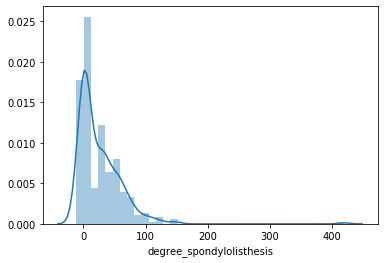

In [71]:
sns.distplot(data2['degree_spondylolisthesis'])

In [72]:
data2.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

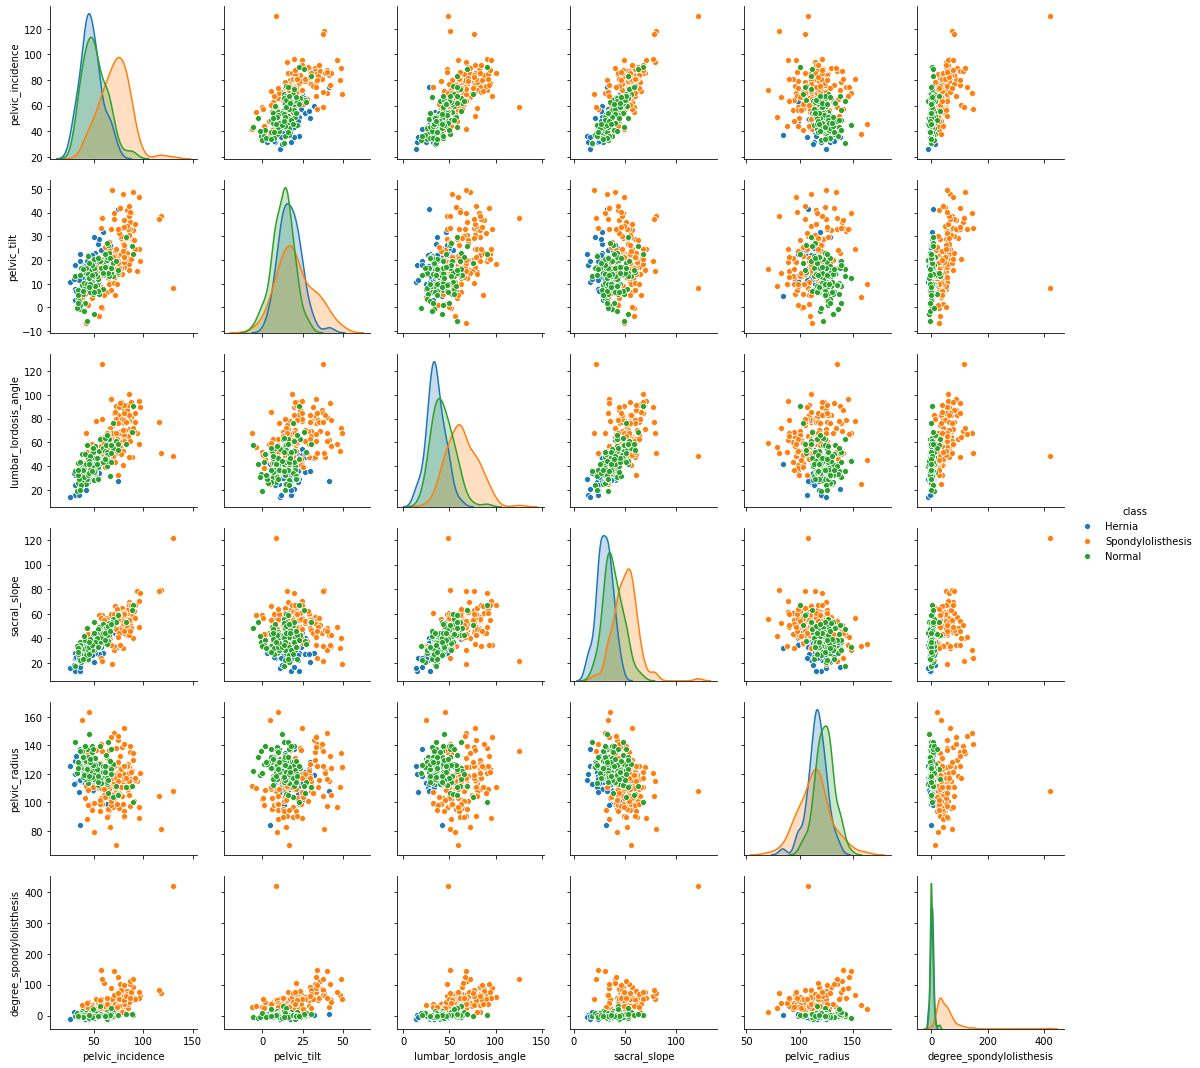

In [73]:
sns.pairplot(data2, hue='class')    

In [78]:
data2.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.590025
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.205158
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.636490
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.604681
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.133424
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.588541
class,0.590025,0.205158,0.636490,0.604681,-0.133424,0.588541,1.000000


In [74]:
# Using LabelEncoder and fitting it to [0,1,2]
le = preprocessing.LabelEncoder()
le.fit([0,1,2])

LabelEncoder()

In [75]:
le.classes_

array([0, 1, 2])

In [79]:
# We now can transform the Labels in Class column in to numeric(0,1,2)
data2['class']=le.fit_transform(data2['class'].astype('str'))
data2.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
190,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,2
69,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,2
247,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307,1
37,35.703458,19.443253,20.700000,16.260205,137.540613,-0.263490,0
225,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159,1
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,1
199,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,2
180,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,2
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,0
79,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,2


In [80]:
# Create a separate dataframe consisting only of the features i.e independent attributes

data2_ind = data2.drop(labels= "class" , axis = 1)
data2_ind.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [81]:
# Capture the class values from the 'class' column into a pandas series akin to array 

data2_lab = data2["class"]

In [82]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

data2_ind_z = data2_ind.apply(zscore)  # convert all attributes to Z scale 
# store the normalized features data into np array 

X = np.array(data2_ind_z)
X.shape

(310, 6)

In [83]:
# store the bc_labels data into a separate np array

y = np.array(data2_lab)
y.shape

(310,)

In [84]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [85]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [86]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [87]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7526881720430108

In [88]:
# calculate accuracy measures and confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

[[10  6  1]
 [ 7 19  1]
 [ 2  6 41]]


In [89]:
print(metrics.accuracy_score(y_test, predicted_labels))

0.7526881720430108


In [90]:
# As total number of rows are 310 , the optimal value of K is less than square root (310)
math.sqrt(310)

17.60681686165901

In [91]:
mis=[0]*10
j=0
ma=0
for i in range(1,18,2):
    N= KNeighborsClassifier(n_neighbors= i, weights = 'distance' )
    N.fit(X_train, y_train)
    predicted_labels = N.predict(X_test)
    N.score(X_test, y_test)
    mis[j]=1-metrics.accuracy_score(y_test, predicted_labels)
    print("For k value {}, the Misclassification error is {}".format(i,metrics.accuracy_score(y_test, predicted_labels)))
    print("For k value {}, the Misclassification error is {}".format(i,mis[j]))
    if ma<=metrics.accuracy_score(y_test, predicted_labels):
        ma=metrics.accuracy_score(y_test, predicted_labels)
        k=i
    j+=1
print("Maximum Accuracy is {} Obtained at K value : {}".format(ma,k))

For k value 1, the Misclassification error is 0.6989247311827957
For k value 1, the Misclassification error is 0.30107526881720426
For k value 3, the Misclassification error is 0.7419354838709677
For k value 3, the Misclassification error is 0.25806451612903225
For k value 5, the Misclassification error is 0.7526881720430108
For k value 5, the Misclassification error is 0.24731182795698925
For k value 7, the Misclassification error is 0.7419354838709677
For k value 7, the Misclassification error is 0.25806451612903225
For k value 9, the Misclassification error is 0.7419354838709677
For k value 9, the Misclassification error is 0.25806451612903225
For k value 11, the Misclassification error is 0.7741935483870968
For k value 11, the Misclassification error is 0.22580645161290325
For k value 13, the Misclassification error is 0.7419354838709677
For k value 13, the Misclassification error is 0.25806451612903225
For k value 15, the Misclassification error is 0.7419354838709677
For k value 1

# Therefore the optimal value of k is 11 with 77.4% accuracy in 3 class problem